# Plotting scripts for multiple targets

----
Copyright (C) 2019  M.A. Gilles

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

----


The primary purpose in distributing this source code is to enable readers to reproduce the numerical  results reported in the manuscript "Surveillance-Evasion Games under Uncertainty" by M.A. Gilles and A. Vladimirsky. See <https://arxiv.org/abs/1812.10620>.

The code can be found at <https://github.com/eikonal-equation/Stationary_SEG>.
Please see README.md for instructions on configuring/running this program.


File: PlotNashMultipleTargets

Author: Marc Aurèle Gilles

Description: This plots loads the data and produces the plots of the Nash equilibrium of the E-O game when multiple evaders have different targets.

This script produces figures 11 and 12 of the paper ( set name to 'FigureEleven' and 'FigureTwelve', respectively in the cell below)


In [8]:
#Set name here.
name = 'FigureTwelve'

In [9]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import os

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
nameP0 = name + 'P0';
outputfolder = '../output/' + nameP0;
fdtype = np.dtype('f8');
SavingToFile = False;


In [10]:
def LoadData(outputfolder):    
    source = np.fromfile(outputfolder + 'Sources', fdtype );
    source = source.reshape([int(source.shape[0]/2), 2]);
    target = np.fromfile(outputfolder + 'Target', fdtype );
    observers = np.fromfile(outputfolder + 'Observers', fdtype );
    observers = observers.reshape([int(observers.shape[0]/2), 2]);
    
    u =  np.fromfile(outputfolder + 'CombinedValue', fdtype );
    u = np.transpose(u.reshape(int(np.sqrt(u.size)),int(np.sqrt(u.size)) ))
    Klambda =   np.transpose(np.fromfile(outputfolder + 'CombinedCost', fdtype ).reshape(u.shape[0],u.shape[1]));
    u[ u > 1e8 ] = np.inf;
    vi = np.zeros([observers.shape[0], u.shape[0],u.shape[1]])
    Ki = np.zeros([observers.shape[0], u.shape[0],u.shape[1]])
    path = [];
    for k in range(0,observers.shape[0]):
        nn = 1
        if os.path.exists(outputfolder[:-2] + 'path'+ str(k)+'P1E0' ):
            for j in range(0, source.shape[0]):
                p = np.fromfile(outputfolder[:-2] + 'path'+ str(k)+outputfolder[-2:]+'E'+str(j), fdtype );
                path.append( p.reshape(int(p.shape[0]/2),2));
        
    return source, target, observers, u , Klambda, vi, Ki, path
            
    
def LoadStrategy(outputfolder):
    costs = np.fromfile(outputfolder+'Costs', fdtype);
    costs = costs.reshape( int(costs.size/(observers.shape[0]+1)), observers.shape[0]+1);
    probs = np.fromfile(outputfolder+'Probabilities', fdtype);
    probs = probs.reshape( int(probs.size/observers.shape[0]), observers.shape[0]);
    theta = np.fromfile(outputfolder+'Theta',fdtype);
    return costs, probs, theta

def GroupPaths(paths, probs):
    
    if len(paths) == 1:
        return paths, [1]
    
    newpaths = [];
    newpaths.append(path[0]);
    newprobs = [probs[0]];
    for i in range(1,len(paths)):
        if paths[i] == []:
            continue;
        found = False;
        for j in range(len(newpaths)):
            l = min(paths[i].shape[0],newpaths[j].shape[0])
            dist = np.linalg.norm(paths[i][0:l,:] - newpaths[j][0:l,:]);
            if dist < np.linalg.norm(paths[i][0:l,:])*1e-2:
                newprobs[j] = newprobs[j] + probs[i];
                found = True;
        if found == False:
            newpaths.append(paths[i])
            newprobs.append(probs[i])
    
    return newpaths, newprobs
          

In [11]:
pc = 0;
outputfolder = '../output/' + nameP0;
[source, target, observers, u, Klambda, vi, Ki,path] = LoadData(outputfolder)
outputfolder = '../output/' + name;
[costs, probs, theta] = LoadStrategy(outputfolder)
lambd = probs[0,:];
lambd_I = lambd[lambd>0];
nonzeroprobs = lambd.shape[0]
nObservers = observers.shape[0];
print('Observer\'s strategy Lambda:', lambd)
delta_errors = costs[1:,-1] - costs[0,-1];


Observer's strategy Lambda: [ 0.16833565  0.04546208  0.36436895  0.          0.          0.42183332]


In [12]:
A = np.matrix(costs[:,:-1]);
Asm = np.matrix(costs[:,lambd>0]);
while A[-1,-1] == 0:
    A = A[:-1,:];
    Asm = Asm[:-1,:];
if np.linalg.norm(Asm[-1,:]  - Asm[-2,:]) < 1e-2:
    Asm = Asm[:-1,:];
Glambda = np.sum(np.squeeze(np.dot(A[0,:],lambd)))
res = np.linalg.norm(np.dot(theta,Asm) - np.ones([1,Asm.shape[1]])*Glambda);
lambd_costs = np.linalg.norm(np.dot(lambd,np.transpose(A)) - np.ones([A.shape[0],1])*Glambda);
namebig = name + 'Big';
if os.path.exists('../output/'+ namebig+'Costs' ):
    costbig = np.fromfile('../output/'+ namebig+'Costs', fdtype);
    costbig = costbig.reshape( int(costbig.size/(observers.shape[0]+1)), observers.shape[0]+1);
    print('Optimization error:', abs(costs[0,-1] - costbig[0,-1])/abs(costs[0,-1])) 
print('Observer\'s regret: ',np.linalg.norm(res)/(abs(costs[0,-1])*nonzeroprobs))
print('Evaders\' regret', np.max(abs(lambd_costs/costs[0,-1])))



Observer's regret:  0.00139098433314
Evaders' regret 0.00805846619196


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 7 but corresponding boolean dimension is 6
  from ipykernel import kernelapp as app


# Load all data

# Plot solution and paths computed

In [13]:
def PlotSol(pc,name):
    from cycler import cycler
    from matplotlib import rc

    figu = plt.figure();
    nx = u.shape[0];
    ny = u.shape[1];
    xcoor = np.linspace(0,1,nx);
    ycoor = np.linspace(0,1,ny);
    plt.set_cmap('viridis')

    # Find pixels in obstacles
    lx = [];
    ly = [];
    for i in range(len(u)):
        for j in range(len(u[0])):
            if u[i][j] == np.inf:
                lx.append(i);
                ly.append(j);
    plt.contour(np.linspace(0,1,nx),  np.linspace(0,1,ny), ((u)), 30,
                     colors=('k'), rasterized = True,zorder=-9 )
    plt.contourf(  np.linspace(0,1,nx),  np.linspace(0,1,ny), ((u)), 30,linestyles = 'solid',zorder=-10);
    # plot pixels in obstacles separately
    plt.plot(xcoor[ly], ycoor[lx], 'o',color = 'gray', markersize=1,  markeredgecolor = 'none')

    plt.plot(source[0][0], source[0][1],marker='d',mfc='red',mec = 'red',markersize=5,mew=5,zorder = 45)

    plt.plot(target[0], target[1],marker='o',mfc='red',mec = 'red',markersize=5,mew=5,zorder = 45)

    #plot observer positions
    for k in range(observers.shape[0]):
        x_string = r'$\boldsymbol{\hat{x}}$';
        int_string = r'$\boldsymbol{'+str(k+1)+'}$';
        plt.text(observers[k,0], observers[k,1], x_string ,ha='center', va='center', fontsize=20,color='white' )
        plt.text(observers[k,0]+0.03, observers[k,1]-0.02, int_string,ha='center', va='center', fontsize=11,color='white',zorder =5 )

        if lambd[k] > 0:
            plt.plot(observers[k,0], observers[k,1], 'o', markersize=100*lambd[k], mec = 'k', mfc = 'k' )


    #
    pathcolors = ['deeppink','b','y','g','c'];
    k = 0;
    while os.path.exists(outputfolder + 'PathPure'+ str(k) ):
        purepath =  np.fromfile(outputfolder + 'PathPure'+ str(k), fdtype );
        purepath = purepath.reshape(int(purepath.size/2), 2) ;
        plt.plot(purepath[:,0], purepath[:,1],'--', color = pathcolors[pc],linewidth = 5,zorder = 44)
        k = k+1;
        pc = pc + 1;



    plt.rc('axes', prop_cycle=(cycler('color', ['b', 'g', 'c','m','y'])))
    for k in range(len(path)):
        if path[k] == []:
            continue;
        plt.plot(path[k][:,0], path[k][:,1],marker='.',color = pathcolors[pc%len(pathcolors)])
        #plt.text(path[k][path[k].shape[0]/2,0], path[k][path[k].shape[0]/2,1], str(np.round(theta[k],3)));
        pc = pc + 1;


    #plt.colorbar()
    #plt.axis('off')
    plt.tight_layout()
    plt.axis('tight')
    plt.axis('equal')
    plt.axis('image')
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    #plt.colorbar()

    if SavingToFile:
        plt.savefig('../manuscript/fig/'+name+'Sol.png', format='png',transparent = True, bbox_inches = 'tight', pad_inches = 0)

    plt.show()

    return

def PlotCosts():
    nx = u.shape[0];
    ny = u.shape[1];
    fig, axes = plt.subplots(2, nObservers, figsize=(nObservers*3, 6))
    for k in range(nObservers):
        axes[0][k].contourf(  np.linspace(0,1,nx),  np.linspace(0,1,ny), vi[k,:,:], 100);
        axes[1][k].contourf(  np.linspace(0,1,nx),  np.linspace(0,1,ny), Ki[k,:,:], 100);
        axes[1][k].axis('equal')
        axes[0][k].axis('equal')

    plt.tight_layout()
    plt.show()
    return 


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Theta for observer 1: [0.15012925555083712, 0.84987074444916766]


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:55: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


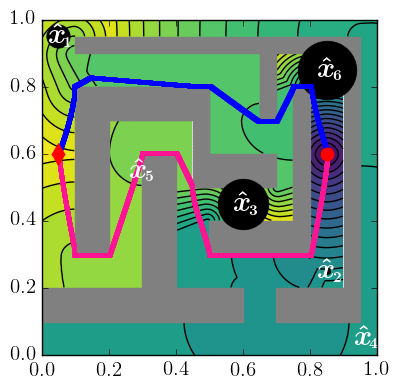

In [14]:
outputfolder = '../output/' + nameP0;
[source, target, observers, u, Klambda, vi, Ki,path] = LoadData(outputfolder);
path = path[0:4];
[path,theta0] = GroupPaths(path,theta);
print('Theta for observer 1:', theta0)

PlotSol(0,name+'P0');


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Theta for observer 2: [0.88746794598044199, 0.11253205401956279]


/Users/mtg79/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:55: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


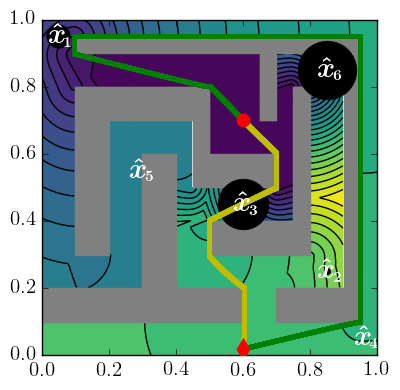

In [15]:
name3 = name + 'P1';
outputfolder = '../output/' + name3;
pc = len(path);
[source, target, observers, u, Klambda, vi, Ki,path] = LoadData(outputfolder);
[path,theta1] = GroupPaths(path[0:4],theta);
print( 'Theta for observer 2:',theta1)
PlotSol(pc,name + 'P1')
